In this file the selection of the order of the AR model is implemented. AIC and BIC scores are calculated, as well as the partial autocorrelation. 
The procedure is done for the full dataset as well as for one year's data in order to check if the size of the dataset impacts the results.

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import os
path = os.path.join(os.path.expanduser('~'), 'Documents', 'for_edit', 'GERMANY_CLEAN_FULL.xlsx')
print (path)

/home/giorgos/Documents/for_edit/GERMANY_CLEAN_FULL.xlsx


In [2]:
df = pd.read_excel(path)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#df = df.set_index('Date Time')
#df.index = pd.to_datetime(df.index)
df=df[['Actual_Load']]
df

,Actual_Load
0,39296
1,39623
2,41180
3,44793
4,53632
...,...
20333,68624
20334,67280
20335,66108
20336,64676


In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults 

In [4]:
rows, cols = (30, 2)
results = np.zeros((rows, cols))
for i in range(rows):
    model = ARIMA(df, order=(i,0,0))
    model_fit = model.fit()
    print(' p= ',i,' , aic = ',model_fit.aic,', bic = ',model_fit.bic)
    results[i,0]=model_fit.aic
    results[i,1]=model_fit.bic

 p=  0  , aic =  609785.2955342303 , bic =  609801.136026903
 p=  1  , aic =  374432.9750087991 , bic =  374456.7357478082
 p=  2  , aic =  357814.962913125 , bic =  357846.6438984704
 p=  3  , aic =  357378.9379291239 , bic =  357418.53916080564
 p=  4  , aic =  357162.40409706836 , bic =  357209.92557508644
 p=  5  , aic =  357152.82669822394 , bic =  357208.2684225784
 p=  6  , aic =  357042.2252847755 , bic =  357105.5872554663
 p=  7  , aic =  356900.69539477944 , bic =  356971.9776118066
 p=  8  , aic =  356888.93193595915 , bic =  356968.1343993227
 p=  9  , aic =  356887.9199107347 , bic =  356975.04262043454
 p=  10  , aic =  356880.5293291331 , bic =  356975.5722851693
 p=  11  , aic =  356867.89726697817 , bic =  356970.8604693507
 p=  12  , aic =  356863.11783636955 , bic =  356974.00128507847
 p=  13  , aic =  356657.3052912528 , bic =  356776.1089862981
 p=  14  , aic =  356447.50604512595 , bic =  356574.22998650756
 p=  15  , aic =  355260.0231043856 , bic =  355394.667

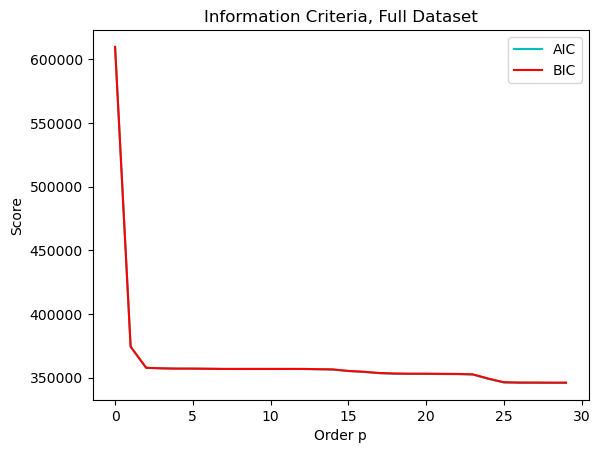

In [5]:
plt.xlabel('Order p') 
plt.ylabel('Score') 
plt.title("Information Criteria, Full Dataset")
plt.plot(results[:,0],'c',label='AIC')
plt.plot(results[:,1],'r',label='BIC')
plt.legend()
plt.show()

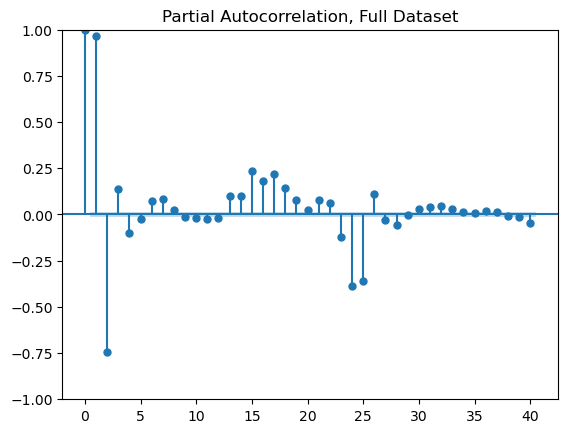

In [6]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df.values.squeeze(), lags=40, method="ywm")
plt.title("Partial Autocorrelation, Full Dataset")
plt.show()

In [7]:
df = pd.read_excel(path)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.set_index('Date Time')
df.index = pd.to_datetime(df.index)
df['year']=df.index.year
df=df[['Actual_Load','year']]
df

,Actual_Load,year
Date Time,,
2012-10-01 01:00:00,39296,2012
2012-10-01 02:00:00,39623,2012
2012-10-01 03:00:00,41180,2012
2012-10-01 04:00:00,44793,2012
2012-10-01 05:00:00,53632,2012
...,...,...
2015-02-02 13:00:00,68624,2015
2015-02-02 14:00:00,67280,2015
2015-02-02 15:00:00,66108,2015


In [8]:
df_14 = df.loc[df.year==2014]
df_14 = df_14[['Actual_Load']]
df_14

,Actual_Load
Date Time,
2014-01-01 00:00:00,42360
2014-01-01 01:00:00,40522
2014-01-01 02:00:00,39388
2014-01-01 03:00:00,38423
2014-01-01 04:00:00,37953
...,...
2014-12-31 19:00:00,49597
2014-12-31 20:00:00,45750
2014-12-31 21:00:00,44515


In [9]:
df_14.reset_index(inplace=True)
df_14

,Date Time,Actual_Load
0,2014-01-01 00:00:00,42360
1,2014-01-01 01:00:00,40522
2,2014-01-01 02:00:00,39388
3,2014-01-01 03:00:00,38423
4,2014-01-01 04:00:00,37953
...,...,...
8658,2014-12-31 19:00:00,49597
8659,2014-12-31 20:00:00,45750
8660,2014-12-31 21:00:00,44515
8661,2014-12-31 22:00:00,45120


In [10]:
df_14.drop('Date Time',axis=1, inplace=True)
df_14

,Actual_Load
0,42360
1,40522
2,39388
3,38423
4,37953
...,...
8658,49597
8659,45750
8660,44515
8661,45120


In [11]:
rows, cols = (30, 2)
results14 = np.zeros((rows, cols))
for i in range(rows):
    model = ARIMA(df_14, order=(i,0,0))
    model_fit = model.fit()
    print(' p= ',i,' , aic = ',model_fit.aic,', bic = ',model_fit.bic)
    results14[i,0]=model_fit.aic
    results14[i,1]=model_fit.bic


 p=  0  , aic =  251788.25594173788 , bic =  251802.38957446165
 p=  1  , aic =  159271.19520425377 , bic =  159292.39565333945
 p=  2  , aic =  151961.23675553277 , bic =  151989.50402098033
 p=  3  , aic =  151823.76989044127 , bic =  151859.1039722507
 p=  4  , aic =  151780.2188539409 , bic =  151822.61975211222
 p=  5  , aic =  151775.8765168427 , bic =  151825.34423137593
 p=  6  , aic =  151731.8772292709 , bic =  151788.41176016603
 p=  7  , aic =  151664.69563214813 , bic =  151728.29697940513
 p=  8  , aic =  151666.083298652 , bic =  151736.75146227088
 p=  9  , aic =  151666.8440394496 , bic =  151744.5790194304
 p=  10  , aic =  151660.35175959993 , bic =  151745.1535559426
 p=  11  , aic =  151651.2244965619 , bic =  151743.09310926645
 p=  12  , aic =  151641.99067153595 , bic =  151740.9261006024
 p=  13  , aic =  151557.28386117032 , bic =  151663.28610659868
 p=  14  , aic =  151444.0311381516 , bic =  151557.10019994184
 p=  15  , aic =  150877.35963334003 , bic =  1

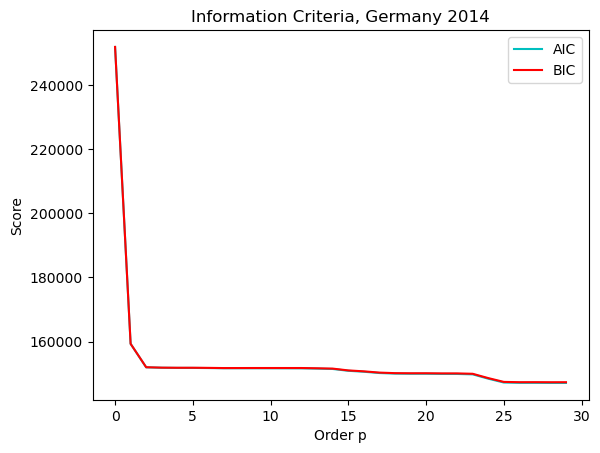

In [12]:
plt.xlabel('Order p') 
plt.ylabel('Score') 
plt.title("Information Criteria, Germany 2014")
plt.plot(results14[:,0],'c',label='AIC')
plt.plot(results14[:,1],'r',label='BIC')
plt.legend()
plt.show()

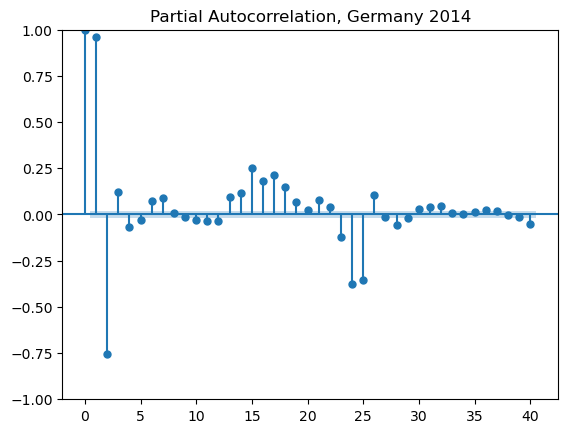

In [13]:
sm.graphics.tsa.plot_pacf(df_14.values.squeeze(), lags=40, method="ywm")
plt.title("Partial Autocorrelation, Germany 2014")
plt.show()